## Import required libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:\S7\FInal Year Project\FPGA-accelerators-for-Traffic-Signal-Classification\Python')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [4]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [5]:
cur_path

'D:\\S7\\FInal Year Project\\FPGA-accelerators-for-Traffic-Signal-Classification\\Python'

## Preprocess the images

In [7]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [8]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [10]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [11]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [12]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Now it's time to build the model

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [19]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 65s 65ms/step - loss: 2.3008 - accuracy: 0.4088 - val_loss: 0.9643 - val_accuracy: 0.7530
Epoch 2/20
981/981 [==============================] - 63s 64ms/step - loss: 0.9631 - accuracy: 0.7093 - val_loss: 0.4102 - val_accuracy: 0.8819
Epoch 3/20
981/981 [==============================] - 61s 62ms/step - loss: 0.6063 - accuracy: 0.8177 - val_loss: 0.2514 - val_accuracy: 0.9274
Epoch 4/20
981/981 [==============================] - 64s 65ms/step - loss: 0.4158 - accuracy: 0.8759 - val_loss: 0.1481 - val_accuracy: 0.9597
Epoch 5/20
981/981 [==============================] - 64s 65ms/step - loss: 0.3272 - accuracy: 0.9061 - val_loss: 0.1042 - val_accuracy: 0.9716
Epoch 6/20
981/981 [==============================] - 63s 64ms/step - loss: 0.2977 - accuracy: 0.9169 - val_loss: 0.0998 - val_accuracy: 0.9721
Epoch 7/20
981/981 [==============================] - 63s 64ms/step - loss: 0.2483 - accuracy: 0.9306 - val_loss: 0.0715 - val_accuracy:

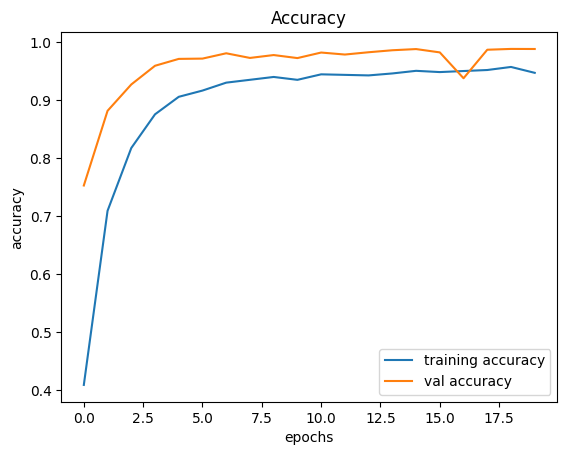

In [22]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

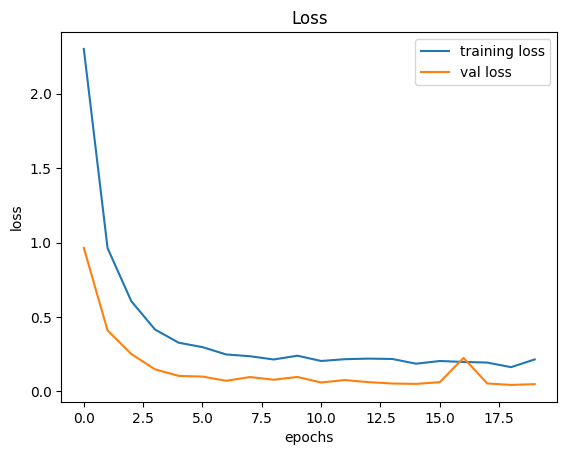

In [23]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [24]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [27]:
X_test, label = testing('Test.csv')

In [28]:
len(X_test)

12630

In [29]:
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
# classes_x
Y_pre = model.predict(X_test) 
Y_pred=np.argmax(Y_pre,axis=1)
Y_pred

395/395 [==============================] - 6s 14ms/step


array([16,  1, 38, ..., 15,  7, 10], dtype=int64)

In [30]:
Y_pre[1]

array([2.0441781e-16, 1.0000000e+00, 2.0273053e-14, 9.1294658e-20,
       2.3877135e-12, 2.0379878e-09, 1.0402124e-15, 3.9564464e-13,
       3.3823268e-21, 4.7814106e-37, 0.0000000e+00, 3.1217521e-28,
       4.7409682e-20, 1.7478768e-25, 8.6900540e-28, 6.2265304e-30,
       3.1137924e-30, 2.2157916e-35, 2.2210352e-23, 1.4618983e-34,
       5.0027657e-34, 2.2786879e-32, 0.0000000e+00, 7.6703104e-38,
       1.4782251e-38, 4.1035530e-31, 1.6032481e-28, 0.0000000e+00,
       1.3891013e-34, 1.5608811e-32, 8.0492170e-38, 4.0786213e-28,
       2.2454616e-36, 3.7780062e-31, 4.3699008e-35, 8.5857424e-33,
       2.7930087e-36, 5.3021448e-27, 3.6459399e-21, 1.4793418e-31,
       1.8745243e-19, 0.0000000e+00, 1.4337398e-31], dtype=float32)

## Accuracy with the test data

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9644497228820269


## Save the model

In [33]:
model.save("./training/TSR.h10")

INFO:tensorflow:Assets written to: ./training/TSR.h10\assets


INFO:tensorflow:Assets written to: ./training/TSR.h10\assets


## Load the Model

In [35]:
import os
os.chdir(r'D:\S7\FInal Year Project\FPGA-accelerators-for-Traffic-Signal-Classification\Python')
from keras.models import load_model
model = load_model('./training/TSR.h10')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [40]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pre = model.predict(X_test) 
    Y_pred=np.argmax(Y_pre,axis=1)
    return image,Y_pred

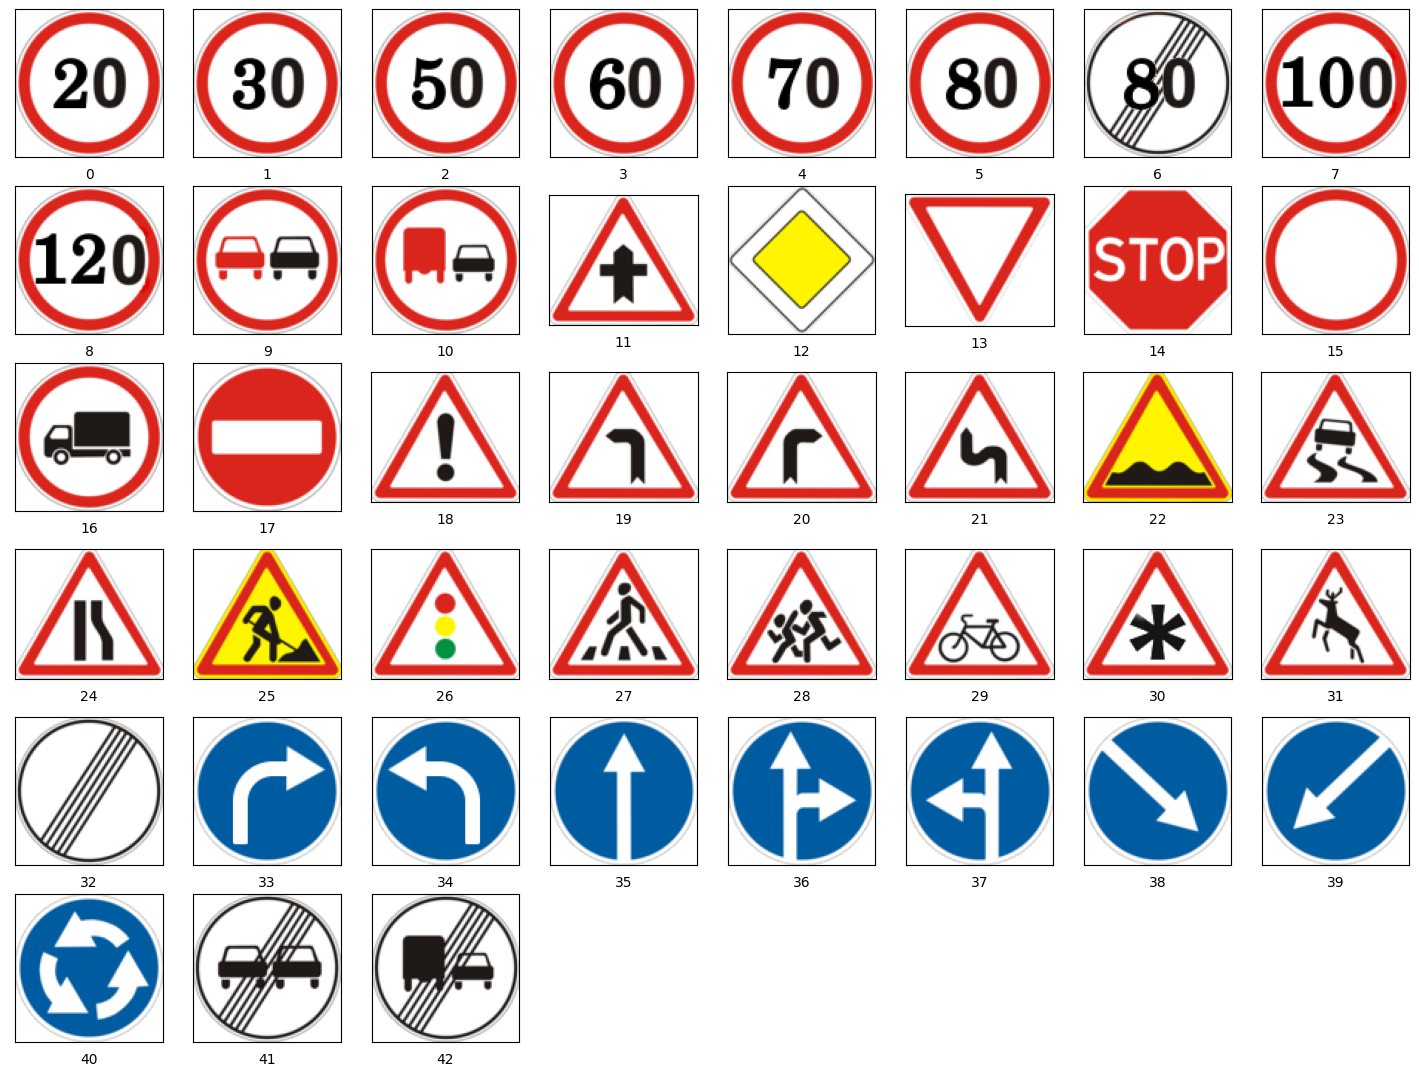

In [50]:
plt.figure(figsize=(18,18))
for i in range (0,43):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  path = f"D:\S7\FInal Year Project\FPGA-accelerators-for-Traffic-Signal-Classification\Python/Meta/{i}.png"
  img=plt.imread(path)
  plt.imshow(img)
  plt.xlabel(i)

1/1 [==============================] - 0s 38ms/step
Predicted traffic sign is:   13 Yield


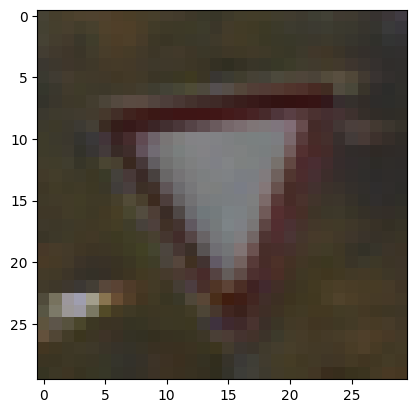

In [51]:
# plot,prediction = test_on_img(r'C:/Users/ANTONY JOY/Desktop/AI- ML/DL_Project/train/03.png')
plot,prediction = test_on_img(r"D:\S7\FInal Year Project\FPGA-accelerators-for-Traffic-Signal-Classification\Python\Test\00089.png")

s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is:  ", a ,classes[a])
plt.imshow(plot)
plt.show()

In [52]:
# model = tf.keras.models.load_model('my_model.h10')

# Get the weights of the first convolutional layer
conv1_weights = model.layers[5].get_weights()[0]

# Print the shape of the weights
print(conv1_weights.shape)
conv1_weights = conv1_weights.reshape(9,4096)
# Save the weights to a file
np.savetxt('conv4_weights.txt', conv1_weights)

(3, 3, 64, 64)


In [46]:
len(model.layers)


12

In [47]:
for i in range (len(model.layers)):
    if len(model.layers[i].get_weights())!=0:
    # print(model.layers[i].get_weights()[0].shape)
        conv1_weights = model.layers[i].get_weights()[0]
        print(conv1_weights.shape)

(5, 5, 3, 32)
(5, 5, 32, 32)
(3, 3, 32, 64)
(3, 3, 64, 64)
(576, 256)
(256, 43)


In [48]:
conv1_weights

array([[ 0.05986365, -0.14824428, -0.07085755, ..., -0.04878844,
        -0.16655132, -0.5310937 ],
       [ 0.02175383, -0.06535023,  0.1507521 , ..., -0.04760636,
        -0.05869668, -0.3520493 ],
       [-0.2833684 , -0.11752542, -0.02547211, ...,  0.10234697,
        -0.10330889,  0.03394715],
       ...,
       [ 0.10119167,  0.03144844, -0.23606439, ..., -0.14263712,
        -0.3696095 , -0.11167835],
       [-0.46193153, -0.01035764, -0.2667521 , ..., -0.31268182,
         0.10091942,  0.05453531],
       [-0.07050103, -0.16393876, -0.08746312, ..., -0.08133945,
         0.0663467 , -0.01857915]], dtype=float32)

In [49]:
type(conv1_weights)

numpy.ndarray